# Atmosphere Words

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
import pandas as pd
pd.set_option("max_rows", 200)
pd.set_option("max_columns", 200)
pd.options.display.float_format = lambda value : '{:.0f}'.format(value) if round(value,0) == value else '{:,.3f}'.format(value)

In [108]:
from pathlib import Path  
import glob

In [109]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import numpy as np

Putting in the texts

In [110]:
directory_path = "../Atmosphere/"

In [111]:
text_files = glob.glob(f"{directory_path}/*.txt")

In [112]:
album_titles = [Path(text).stem for text in text_files]

# Word Frequency

In [113]:
STOPS = open('../stop-words.txt', encoding="utf-8").read().split('\n')

In [114]:
#Initialize CountVectorizer with desired parameters
count_vectorizer= CountVectorizer(input='filename', stop_words= set(STOPS))

#Plug in "text_files," which contains all the albums, to the initialized count_vectorizer
word_count_vector = count_vectorizer.fit_transform(text_files)

In [115]:
#Make a DataFrame out of the word count vector and sort by title
word_count_df = pd.DataFrame(word_count_vector.toarray(), index=album_titles, columns=count_vectorizer.get_feature_names())
word_count_df = word_count_df.sort_index()

In [116]:
#adding in the years manually into a correctly ordered list
year = [2016, 2016, 2002, 1999, 2001, 2018, 1997, 2007, 2003, 2014, 2011, 2010, 2008, 2019, 2005]
word_count_df['year'] = year

In [117]:
#Add column for number of times each word appears in all the documents
word_count_df.loc['Document Frequency'] = (word_count_df > 0).sum()

In [118]:
word_count_df.sample(10, axis='columns')

,able,rivers,taylors,figures,deeper,ballad,temperment,except,grabbing,hymns
Fishing-Blues,0,1,0,0,0,0,0,0,0,0
Frida-Kahlo-vs-Ezra-Pound,0,0,0,0,0,0,0,0,0,0
God-Loves-Ugly,0,0,0,0,0,0,0,0,1,0
Headshots-Se7en,1,0,1,0,0,0,0,0,0,0
Lucy-Ford-The-Atmosphere-EP-s,0,0,0,0,0,0,0,2,0,0
Mi-Vida-Local,0,0,0,3,0,1,0,1,0,0
Overcast,13,0,0,0,0,0,0,0,0,0
Sad-Clown-Bad-Year,0,0,0,0,0,0,0,2,0,1
Seven-s-Travels,0,0,0,0,0,0,1,0,0,0
Southsiders,0,0,0,0,0,0,0,0,0,0


**Zoom in on specific words**

# Look at certain words/word groupings

# Minnesota/the area

In [119]:
#need to figure out how to do a compound search: ie St Paul,S aint Paul, 612, 6-1-2
MN_list = ['minnesota', 'minneapolis', 'st', 'minneap', 'timber', 'twins', 'southside', 'minnesnowta', 'minnesnowda', 'midwest', 'saint']

In [120]:
MN_df = word_count_df.sort_values(by = 'year')[MN_list]
MN_df

,minnesota,minneapolis,st,minneap,timber,twins,southside,minnesnowta,minnesnowda,midwest,saint
Document Frequency,11,7,5,3,1,2,6,1,1,2,3
Overcast,1,2,2,2,0,0,0,0,0,1,0
Headshots-Se7en,2,1,1,0,0,2,1,0,1,0,1
Lucy-Ford-The-Atmosphere-EP-s,2,0,1,0,0,0,0,0,0,0,0
God-Loves-Ugly,2,1,0,0,0,0,0,0,0,0,0
Seven-s-Travels,4,6,2,0,0,0,0,1,0,3,0
You-Can-t-Imagine-How-Much-Fun-We-re-Having,1,1,1,0,0,0,1,0,0,0,0
Sad-Clown-Bad-Year,1,0,0,1,1,1,2,0,0,0,0
When-Life-Gives-You-Lemons-You-Paint-That-Shit-Gold,1,0,0,0,0,0,0,0,0,0,1
To-All-My-Friends-Blood-Makes-the-Blade-Holy-The-Atmosphere-Eps,1,0,0,0,0,0,0,0,0,0,1


In [121]:
newMN_df = MN_df.drop('Document Frequency', errors='ignore')
newMN_df

,minnesota,minneapolis,st,minneap,timber,twins,southside,minnesnowta,minnesnowda,midwest,saint
Overcast,1,2,2,2,0,0,0,0,0,1,0
Headshots-Se7en,2,1,1,0,0,2,1,0,1,0,1
Lucy-Ford-The-Atmosphere-EP-s,2,0,1,0,0,0,0,0,0,0,0
God-Loves-Ugly,2,1,0,0,0,0,0,0,0,0,0
Seven-s-Travels,4,6,2,0,0,0,0,1,0,3,0
You-Can-t-Imagine-How-Much-Fun-We-re-Having,1,1,1,0,0,0,1,0,0,0,0
Sad-Clown-Bad-Year,1,0,0,1,1,1,2,0,0,0,0
When-Life-Gives-You-Lemons-You-Paint-That-Shit-Gold,1,0,0,0,0,0,0,0,0,0,1
To-All-My-Friends-Blood-Makes-the-Blade-Holy-The-Atmosphere-Eps,1,0,0,0,0,0,0,0,0,0,1
The-Family-Sign,0,0,0,0,0,0,1,0,0,0,0


In [122]:
#newMN_df.loc['Total'] = newMN_df.sum()
newMN_df['Total'] = newMN_df.sum(axis=1)

In [123]:
newMN_df

,minnesota,minneapolis,st,minneap,timber,twins,southside,minnesnowta,minnesnowda,midwest,saint,Total
Overcast,1,2,2,2,0,0,0,0,0,1,0,8
Headshots-Se7en,2,1,1,0,0,2,1,0,1,0,1,9
Lucy-Ford-The-Atmosphere-EP-s,2,0,1,0,0,0,0,0,0,0,0,3
God-Loves-Ugly,2,1,0,0,0,0,0,0,0,0,0,3
Seven-s-Travels,4,6,2,0,0,0,0,1,0,3,0,16
You-Can-t-Imagine-How-Much-Fun-We-re-Having,1,1,1,0,0,0,1,0,0,0,0,4
Sad-Clown-Bad-Year,1,0,0,1,1,1,2,0,0,0,0,6
When-Life-Gives-You-Lemons-You-Paint-That-Shit-Gold,1,0,0,0,0,0,0,0,0,0,1,2
To-All-My-Friends-Blood-Makes-the-Blade-Holy-The-Atmosphere-Eps,1,0,0,0,0,0,0,0,0,0,1,2
The-Family-Sign,0,0,0,0,0,0,1,0,0,0,0,1


# Graph 
**MN references**

In [124]:
values = newMN_df[['Total']]

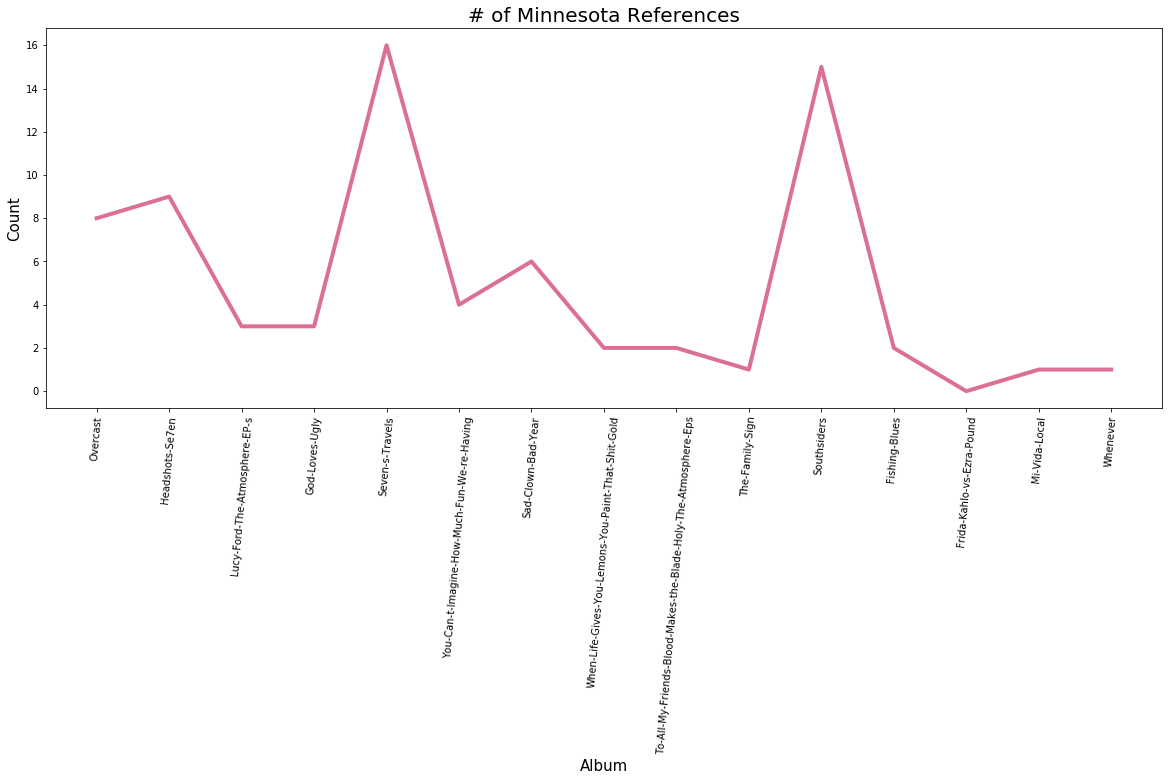

In [125]:
plt.figure(figsize=(20, 7))

plt.plot(newMN_df.index, values, color='palevioletred', linewidth = 4.0)
plt.xlabel('Album', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('# of Minnesota References', fontsize = 20)
plt.xticks(rotation=85)
plt.show()
#plt.savefig('MN.png', bbox_inches='tight')

# Cuss Words

In [126]:
lang_list = ['fuck', 'fucks', 'fucking', 'fuckin', 'fucker', 'fucked', 'motherfucker', 'motherfuckers', 'motherfuckin', 'mothafucka', 'muthafuck', 'muthafucker', 'shit', 'bullshit', 'hell', 'dick', 'dicks', 'cock', 'bitch', 'bitches', 'sluts', 'slut', 'tit', 'tits', 'titties', 'hoes', 'whore', 'cum', 'ass', 'asses', 'asshole', 'pussy', 'cunt', 'clits', 'faggot', 'bastard' ]

In [127]:
lang_df = word_count_df.sort_values(by = 'year')[lang_list]

In [128]:
newlang_df = lang_df.drop('Document Frequency', errors='ignore')
#newlang_df.loc["Total"] = newlang_df.sum()
newlang_df['Total'] = newlang_df.sum(axis=1)

In [129]:
newlang_df

,fuck,fucks,fucking,fuckin,fucker,fucked,motherfucker,motherfuckers,motherfuckin,mothafucka,muthafuck,muthafucker,shit,bullshit,hell,dick,dicks,cock,bitch,bitches,sluts,slut,tit,tits,titties,hoes,whore,cum,ass,asses,asshole,pussy,cunt,clits,faggot,bastard,Total
Overcast,56,0,8,4,0,2,4,0,0,0,1,2,45,3,7,0,0,1,13,3,0,0,0,0,0,0,0,0,11,0,3,2,0,0,0,2,167
Headshots-Se7en,38,3,7,4,1,6,7,4,0,1,0,0,52,3,9,8,2,2,33,6,3,0,0,3,1,3,4,3,13,1,3,2,0,3,1,2,228
Lucy-Ford-The-Atmosphere-EP-s,3,0,4,0,0,0,1,0,0,0,0,0,2,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,17
God-Loves-Ugly,26,1,18,1,0,0,0,0,0,0,0,0,15,2,12,2,0,0,6,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,88
Seven-s-Travels,18,1,12,2,1,2,3,2,0,0,0,0,8,1,11,1,0,1,8,0,0,0,0,0,0,0,2,0,2,0,5,0,0,0,0,0,80
You-Can-t-Imagine-How-Much-Fun-We-re-Having,16,0,4,3,0,1,0,0,1,0,0,0,1,0,3,1,0,0,4,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,39
Sad-Clown-Bad-Year,13,0,3,0,0,1,1,0,0,0,0,0,9,0,1,3,0,0,3,0,0,1,0,1,0,0,0,0,8,0,0,0,0,0,0,0,44
When-Life-Gives-You-Lemons-You-Paint-That-Shit-Gold,8,2,1,3,0,1,0,0,0,0,0,0,8,1,1,2,0,0,6,0,0,0,0,0,0,1,0,0,4,0,1,0,0,0,0,0,39
To-All-My-Friends-Blood-Makes-the-Blade-Holy-The-Atmosphere-Eps,6,0,2,0,0,1,0,1,0,0,0,0,4,0,3,0,0,0,1,0,0,0,1,1,0,0,0,0,3,0,0,0,0,0,0,0,23
The-Family-Sign,7,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,13


# Graph 
**Bad Language**

In [130]:
values = newlang_df[['Total']]

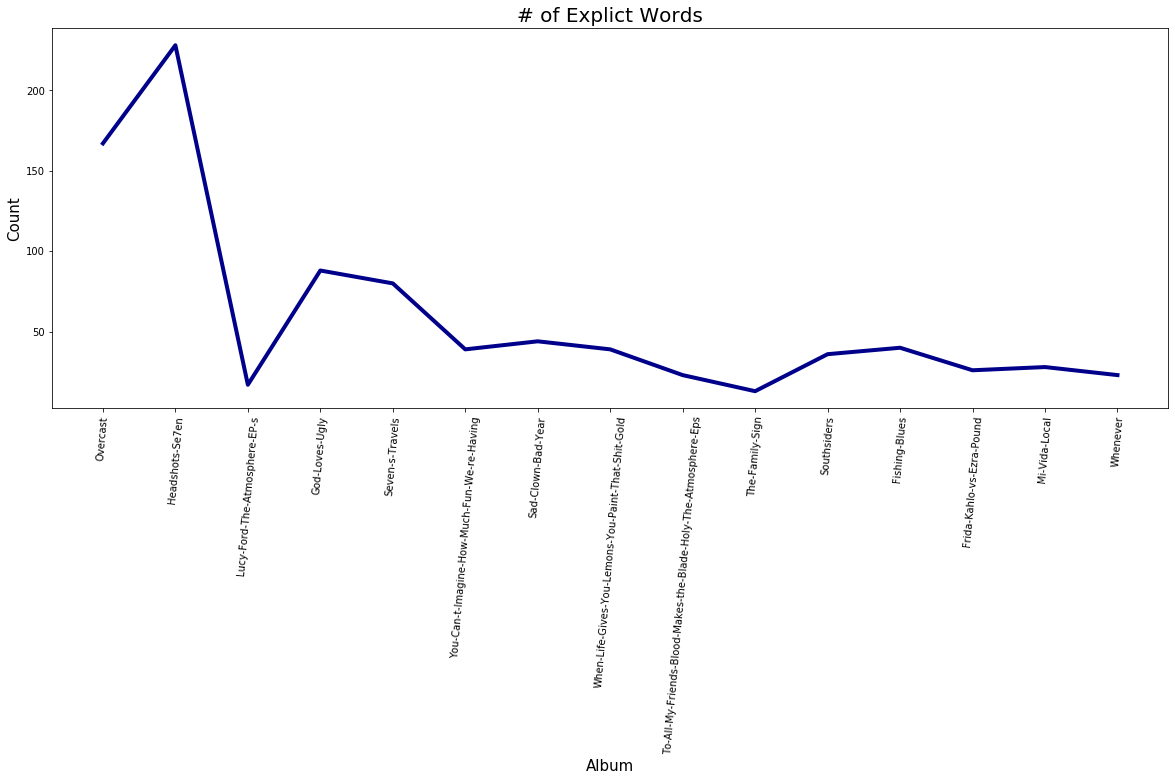

In [132]:
plt.figure(figsize=(20, 7))

plt.plot(newlang_df.index, values, color='darkblue', linewidth = 4.0)
plt.xlabel('Album', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('# of Explict Words', fontsize = 20)
plt.xticks(rotation=85)
plt.show()
#plt.savefig('explict.png', bbox_inches='tight')

**Self-References**

In [133]:
self_list = ['atmosphere', 'atmos', 'atmospheric', 'slug', 'sean', 'ant', 'anthony', 'spawn',]

In [134]:
self_df = word_count_df.sort_values(by = 'year')[self_list]

In [135]:
newself_df = self_df.drop('Document Frequency', errors='ignore')
#newlang_df.loc["Total"] = newlang_df.sum()
newself_df['Total'] = newself_df.sum(axis=1)

In [136]:
newself_df

,atmosphere,atmos,atmospheric,slug,sean,ant,anthony,spawn,Total
Overcast,17,3,3,10,4,2,0,10,49
Headshots-Se7en,5,0,0,14,6,4,0,0,29
Lucy-Ford-The-Atmosphere-EP-s,2,0,0,2,3,0,0,0,7
God-Loves-Ugly,3,0,0,21,3,1,0,0,28
Seven-s-Travels,1,0,0,3,4,1,0,0,9
You-Can-t-Imagine-How-Much-Fun-We-re-Having,0,0,0,1,3,1,1,0,6
Sad-Clown-Bad-Year,0,0,0,0,1,3,0,0,4
When-Life-Gives-You-Lemons-You-Paint-That-Shit-Gold,0,0,0,0,1,0,0,0,1
To-All-My-Friends-Blood-Makes-the-Blade-Holy-The-Atmosphere-Eps,0,0,0,1,4,0,0,0,5
The-Family-Sign,0,0,0,0,1,0,0,0,1


# Graph 
**Self References**

In [137]:
values = newself_df[['Total']]

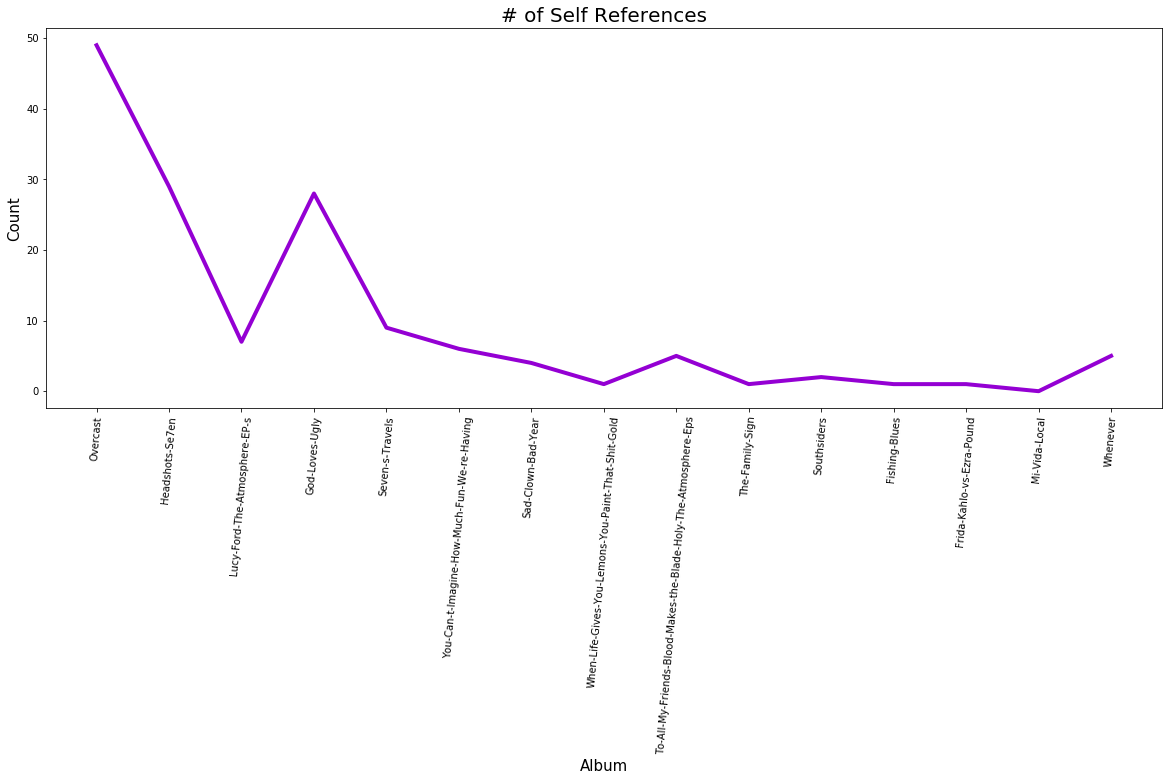

In [138]:
plt.figure(figsize=(20, 7))

plt.plot(newself_df.index, values, color='darkviolet', linewidth = 4.0)
plt.xlabel('Album', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('# of Self References', fontsize = 20)
plt.xticks(rotation=85)
plt.show()
#plt.savefig('self.png', bbox_inches='tight')

**Most frequent words:**
not using this

def get_top_n_counts(dataframe, top_n=5):
    pretty_df = dataframe.stack().groupby(level=0).nlargest(top_n).reset_index()
    pretty_df = pretty_df.rename(columns={0:'count', 'level_1': 'album', 'level_2': 'word'})
    pretty_df = pretty_df.drop(columns='level_0')
    pretty_df['word_freq_rank'] = pretty_df.groupby('album')['count'].rank(method='min', ascending=False)
    return pretty_df

word_count_df = word_count_df.drop('Document Frequency', errors='ignore')

top_word_freq = get_top_n_counts(word_count_df)
top_word_freq

**Words in Context**
using this to check on certain words to see how they are used in context

In [27]:
from IPython.display import Markdown, display
import glob
from pathlib import Path
import re

In [28]:
import nltk
from collections import Counter
import os
import re

In [139]:
word = "twins"
for file in glob.glob(f"../Atmosphere/*.txt"):
    song_title = Path(file).stem.replace("-", " ")
    
    text = open(file).read()
    for line in text.split("\n"):
        if re.search(f"\\b{word}\\b", line, flags=re.IGNORECASE):
            line_with_bolding = re.sub(f"\\b{word}\\b", f"**{word}**", line, flags=re.IGNORECASE)
            display(Markdown(f"Line: {line_with_bolding} <br> From: {song_title} "))

Line: Mother of two, no one knew, because the **twins** stayed with her mom <br> From: Headshots Se7en 

Line: Mother of two, no one knew, because the **twins** stayed with her mom <br> From: Headshots Se7en 

Line: The **twins** and the timber wolves <br> From: Sad Clown Bad Year 